In [58]:
import pandas as pd
df = pd.read_csv("students_placement.csv")
df.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [59]:
df.shape

(300, 4)

In [60]:
x=df.drop(["placed"],axis=1)
x

,cgpa,iq,profile_score
0,5.97,106,61
1,6.83,113,77
2,6.60,110,61
3,5.54,113,68
4,6.84,102,67
...,...,...,...
295,6.44,107,54
296,6.09,108,52
297,7.68,101,70
298,7.00,90,28


In [61]:
y = df['placed']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [63]:
x_train.shape

(240, 3)

In [64]:
x_test.shape

(60, 3)

In [65]:
y_test.shape

(60,)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
knn.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [68]:
import numpy as np
input_data=(7.68,101,70)
convert_to_array=np.asarray(input_data)
re_shape=convert_to_array.reshape(1,-1)
prediction=knn.predict(re_shape)
print(prediction)
knn.score(x_test,y_test)

[0]


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9333333333333333

In [69]:
if prediction==0:
    print("unplaced")
else:
    print("placed")    

unplaced


In [70]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

cm

array([[29,  2],
       [ 2, 27]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

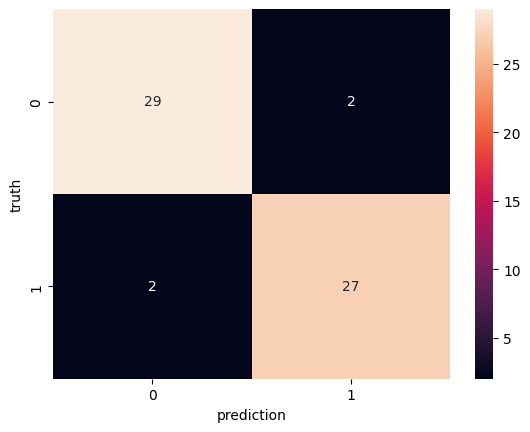

In [71]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

# Assuming 'cm' is the confusion matrix
sn.heatmap(cm, annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')
          

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.93      0.93      0.93        29

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60

